In [108]:
#Read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
reg = pd.read_csv("regression-data-set.csv")
reg.head()

,x,y
0,1.00,3.14
1,1.14,3.17
2,1.28,3.09
3,1.42,3.08
4,1.57,3.09


In [109]:
#Convert the x and y columns into numpy arrays
x = np.array(reg["x"])
y = np.array(reg["y"])
x,y

(array([ 1.  ,  1.14,  1.28,  1.42,  1.57,  1.71,  1.85,  1.99,  2.13,
         2.27,  2.41,  2.56,  2.7 ,  2.84,  2.98,  3.12,  3.26,  3.4 ,
         3.55,  3.69,  3.83,  3.97,  4.11,  4.25,  4.39,  4.54,  4.68,
         4.82,  4.96,  5.1 ,  5.24,  5.38,  5.53,  5.67,  5.81,  5.95,
         6.09,  6.23,  6.37,  6.52,  6.66,  6.8 ,  6.94,  7.08,  7.22,
         7.36,  7.51,  7.65,  7.79,  7.93,  8.07,  8.21,  8.35,  8.49,
         8.64,  8.78,  8.92,  9.06,  9.2 ,  9.34,  9.48,  9.63,  9.77,
         9.91, 10.05, 10.19, 10.33, 10.47, 10.62, 10.76, 10.9 , 11.04,
        11.18, 11.32, 11.46, 11.61, 11.75, 11.89, 12.03, 12.17, 12.31,
        12.45, 12.6 , 12.74, 12.88, 13.02, 13.16, 13.3 , 13.44, 13.59,
        13.73, 13.87, 14.01, 14.15, 14.29, 14.43, 14.58, 14.72, 14.86,
        15.  ]),
 array([3.14, 3.17, 3.09, 3.08, 3.09, 3.03, 3.1 , 2.96, 3.04, 3.05, 3.03,
        3.05, 2.95, 2.94, 2.89, 2.87, 2.98, 2.91, 3.01, 3.02, 3.02, 3.05,
        3.06, 2.94, 3.03, 3.09, 3.1 , 3.05, 3.05, 3.09

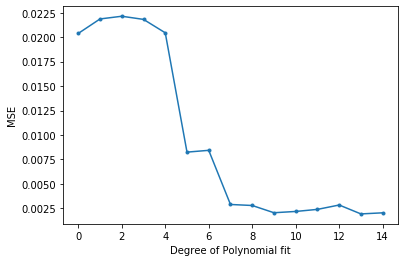

In [110]:
#D. write a function that will performm polynomial fits of multiple degrees
#for a single train/test split of the data
#and returns some measure of the mean squared error

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#A function that returns the fit and MSE
#Given a polynomial degree, training, and test data.
def degreePredictMSE(degree, xtrain, xtest, ytrain, ytest):
    fit = np.polyfit(xtrain, ytrain, degree)
    predictedValues = np.polyval(fit, xtest)
    mse = mean_squared_error(ytest, predictedValues)
    return fit, mse

#Split the x and y data 
#Call degreePredict on our train/test split.
#Get polynomial coefficients for degrees 0-15.
xtrain, xtest, ytrain, ytest = train_test_split(x,y)
numDegrees = 15
predictions = []
mseList = []
for degree in range(numDegrees):
    fit, mse = degreePredictMSE(degree, xtrain, xtest, ytrain, ytest)
    predictions.append(fit)
    mseList.append(mse)

#Taking a look at the plot of degree vs MSE
degreeIndexes = np.arange(numDegrees)
plt.xlabel("Degree of Polynomial fit")
plt.ylabel("MSE")
plt.plot(degreeIndexes, mseList, marker=".")

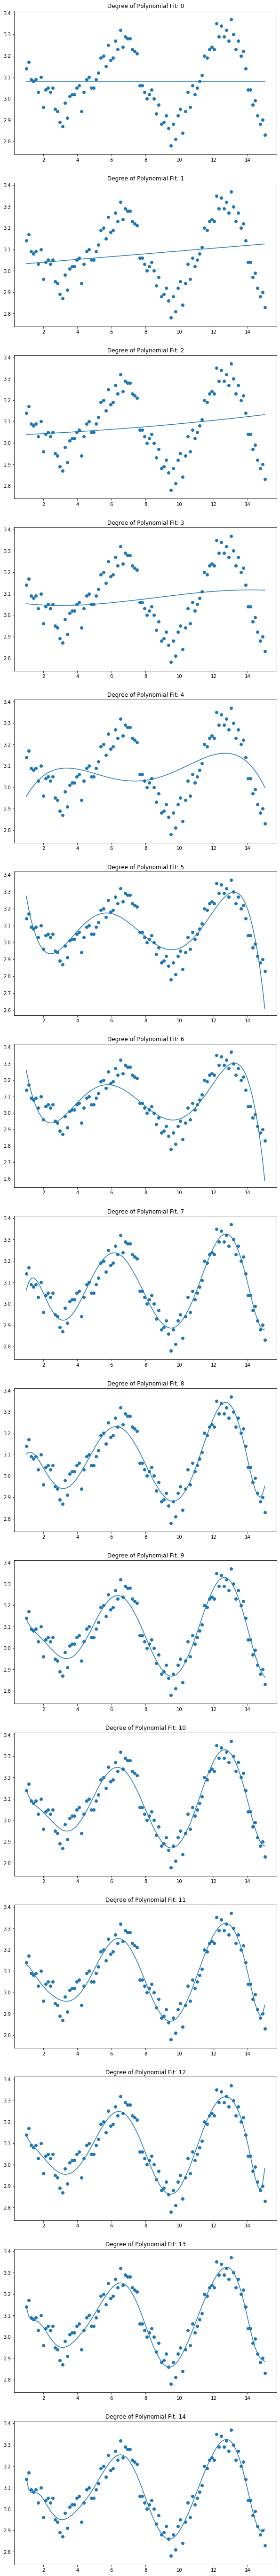

In [114]:
#Let's take a look at graphs of these polynomials over the x data domain.
#(just for funzies)
fig2,axs = plt.subplots(numDegrees)
fig2.set_size_inches(10, 100)
for i in range(0, numDegrees):
    xplot = np.linspace(x.min(), x.max(), 100)
    ypredict = np.polyval(predictions[i], xplot)
    axs[i].set_title("Degree of Polynomial Fit: " + str(i))
    axs[i].scatter(x, y)
    axs[i].plot(x, ypredict)

In [115]:
#E. Perform 100 train/test splits and collect
#The errors as a function of degree. You will have 100 errors for each degree.

#perform 100 train/test splits
#using our degreePredictMSE function.
predictions = [[0 for p in range(100)] for d in range(numDegrees)]
mses = [[0 for m in range(100)] for d in range(numDegrees)] 
for degree in range(numDegrees):
    for j in range(100):
        xtr, ytr, xtst, ytst = train_test_split(x,y)
        fit, mse = degreePredictMSE(degree, xtr, ytr, xtst, ytst)
        mses[degree][j] = mse

#F For each degree, find the mean and standard deviation of the error.
mseMeans = [0] * numDegrees
mseStds = [0] * numDegrees
for degree in range(numDegrees):
    mseMeans[degree] = np.mean(mses[degree])
    mseStds[degree] = np.std(mses[degree])
    
mseMeans, mseStds

([0.021026252088888895,
  0.020441618252717186,
  0.021518467900768997,
  0.022220932623866776,
  0.02071259437047947,
  0.008658510719367393,
  0.00891471592080983,
  0.00288280831253303,
  0.003046452696183516,
  0.0022820421062749122,
  0.0025082738242740476,
  0.0027499138707413806,
  0.0032392924270118768,
  0.002544281225810211,
  0.0036907396951793934],
 [0.003174104172439178,
  0.003692551443934152,
  0.004519587664586238,
  0.004179107830104726,
  0.003977822235119974,
  0.0031090406754018082,
  0.0033376270874058357,
  0.0006748187051097914,
  0.001079106951791434,
  0.0004565811871510023,
  0.0009139281579249677,
  0.0025891636867913753,
  0.003741421538663734,
  0.001343246137628376,
  0.0034349355216300045])

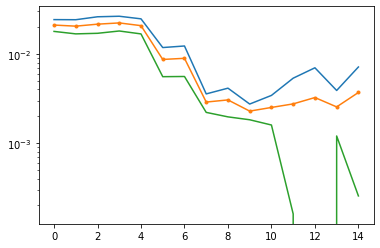

In [116]:
#G. Make a plot(you may want to use a logarithmic scale on the y-axis)
# of the error as a function of degree.  
# (As an example, see the middle line, with the dots, below.)
#H On the same plot, add the mean plus/minus one sigma.

#Cast these lists as numpy arrays so we can use numpy element-wise operators on them
mseMeans = np.array(mseMeans)
mseStds = np.array(mseStds)
xplots = np.arange(numDegrees)
plt.yscale("log")

#Plot the degrees on the x axis,
#and the MSE Means
#sandwiched between the means +- std
plt.plot(xplots, mseMeans + mseStds)
plt.plot(xplots, mseMeans, marker=".")
plt.plot(xplots, mseMeans - mseStds)

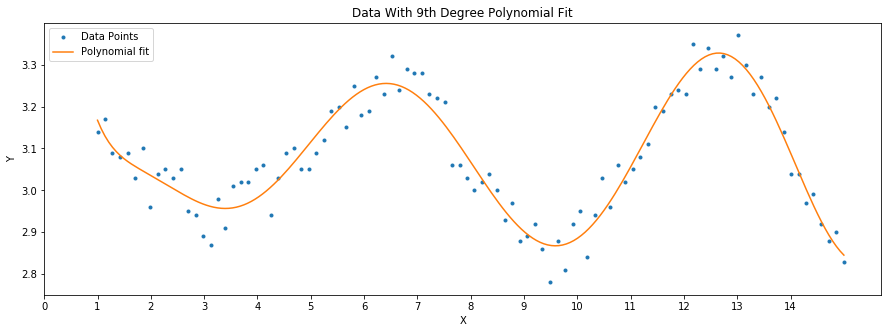

In [117]:
#Degree 9 looks nice. 
#It has the lowest MSE and the standard deviation
#tells us that it will usually fall within this low range.
#let's plot it against the original data.
fit9 = np.polyfit(x, y, 9)
values9 = np.polyval(fit9, np.linspace(min(x), max(x), 200))
plt.plot(x, y, marker=".", linestyle="none", label="Data Points")
plt.plot(np.linspace(min(x), max(x), 200), values9, label="Polynomial fit")

#massage the graph to make it look pretty.
plt.title("Data With 9th Degree Polynomial Fit")
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(ticks=np.arange(15))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")
